# **Iris CSV Dataset**

&emsp;Given a CSV Dataset of Iris, let's explore the data and perform a basic analysis of it. <br>
&emsp;Dataset link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv <br>
&emsp;Refer the Datasets folder for a copy of the dataset. <br>

<br>**1. Importing Dataset**

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Importing CSV data
df = pd.read_csv("./Datasets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Index itself acts as an Id - Explicit ID not required
df.drop('Id', axis=1,inplace=True)  # Running this cell twice will lead to KeyError obviously because 2nd time 'Id' column won't be available
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<br>**2. Basic Data Understanding**

In [4]:
# Shape of the dataset
df.shape

(150, 5)

In [5]:
# Summary Statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Species distribution - how much entries in dataset for each species available?
# Thought process: group by Species and find the size of each species
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<br>**3. Data Visualization**

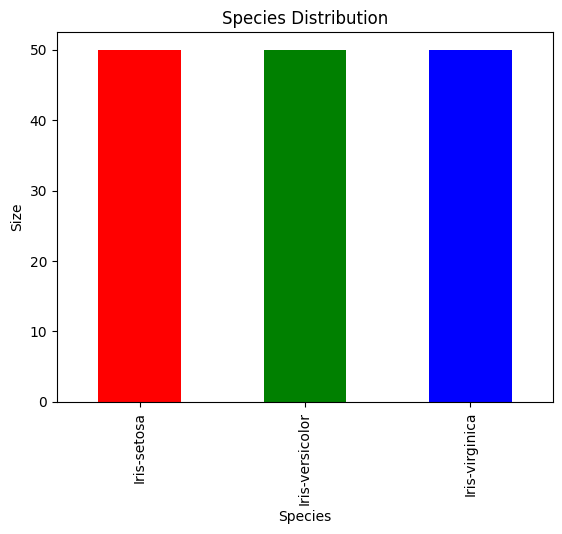

In [7]:
# Species Distribution
ax = df.groupby("Species").size().plot(kind="bar", color = ["red", "green", "blue"])
ax.set_title("Species Distribution")
# ax.set_xlabel("Species")  # Available by default
ax.set_ylabel("Size")
# ax.set_xticklabels(['Iris-Setosa','Iris-Versicolor','Iris-virginica'])  # Available by default
# ax.set_ylim(0,55)   # Available already - 55 (50 + 5 (programmer's choice)) to give some space above the graph
plt.show()

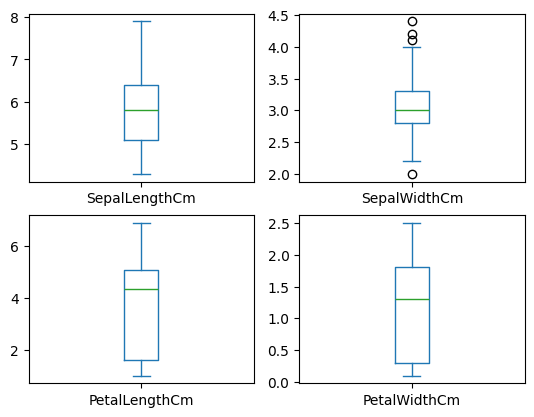

In [8]:
# Box and whisker plots
df.plot(kind = "box", subplots=True, layout=(2,2),sharex = False, sharey = False)
plt.show()

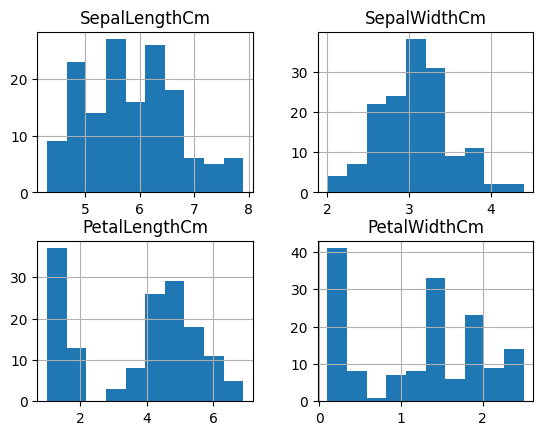

In [9]:
# Histogram
df.hist()
plt.show()

<br>**4. Train-Test Split**

In [10]:
# "Species" is our target feature.
# X contains all features except "Species". Y contains "Species"

# let 'col' contain all column names except Species
col = list(df.columns)
col.remove("Species")
X = df[col]
Y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 1)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [11]:
y_train

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
            ...       
133     Iris-virginica
137     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
Name: Species, Length: 120, dtype: object

In [12]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [13]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
56     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
29         Iris-setosa
120     Iris-virginica
94     Iris-versicolor
5          Iris-setosa
102     Iris-virginica
51     Iris-versicolor
78     Iris-versicolor
42         Iris-setosa
92     Iris-versicolor
66     Iris-versicolor
31         Iris-setosa
35         Iris-setosa
90     Iris-versicolor
84     Iris-versicolor
77     Iris-versicolor
40         Iris-setosa
125     Iris-virginica
99     Iris-versicolor
33         Iris-setosa
19         Iris-setosa
73     Iris-versicolor
146     Iris-virginica
Name: Species, dtype: object

<br>**5. Algorithms**

In [14]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of Logistic Regression: ",accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.9666666666666667


In [16]:
# Linear Discriminant Analysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy of LinearDiscriminantAnalysis:", score)

Accuracy of LinearDiscriminantAnalysis: 1.0


In [21]:
# K Nearest Neighbors
model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of K Nearest Neighbors (KNN):", accuracy_score(y_test, y_pred))

Accuracy of K Nearest Neighbors (KNN): 1.0


In [23]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", score)

Accuracy of Decision Tree: 0.9666666666666667


In [26]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes: ", score)

Accuracy of Naive Bayes:  0.9666666666666667


In [29]:
# Support Vector Machine
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print("Accuracy of SVM:", score)

Accuracy of SVM: 0.9666666666666667


In [32]:
# K Fold Accuracy Analysis
models = []
models.append(("LR", LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma = 'auto')))

# Evaluate each model in turn
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR : 0.941667 (0.065085)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.041667)
CART : 0.941667 (0.038188)
NB : 0.950000 (0.055277)
SVM : 0.983333 (0.033333)


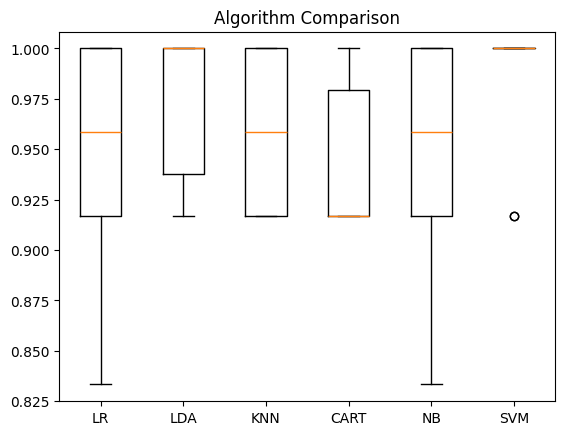

In [36]:
# Comparison of Algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

<br> **6. Evaluations**

In [40]:
# Accuracy, Confusion Matrix, Classification Report
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



<br><br> Now that we have tried to explore Iris Dataset and fit some models to predict the labels accurately, there's one more thing. What if the Iris Dataset not in CSV file format? If you download the Iris Dataset from UCI Machine Learning Repository, you will need to import the file in a bit different way. The analysis won't change. Let's explore this in the next notebook. Try it yourself before seeing the next notebook. Stay Curious! 
<br> Dataset link: https://archive.ics.uci.edu/dataset/53/iris